In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from urllib.request import urlopen   # in Python3
import numpy as np
%matplotlib inline

url = "http://wiki.nurserylive.com/uploads/default/original/2X/b/bd24518a6fb6b8dbe9e55bb793a94df7adbe9bc1.png"

<class 'numpy.ndarray'>
(315, 600, 3)


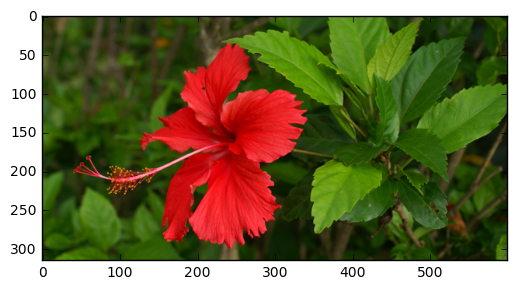

In [3]:
try:
    data = urlopen(url) #in Python3
except Exception:
    from io import BytesIO
    data = BytesIO(urlopen(url).read())  # in Python3
    
# First, load the image
image = mpimg.imread(data)
print(type(image))

# Print out its shape
print(image.shape)
plt.imshow(image)
plt.show()

In [5]:
print(image[0][0][0], image[0][0][1], image[0][0][2] )   # 첫번째 픽셀의 normalized R, G, B 값

0.156863 0.270588 0.0117647


In [7]:
import tensorflow as tf
print(tf.__version__)

1.0.1


(315, 600, 3)
<class 'numpy.ndarray'>
(600, 315, 3)


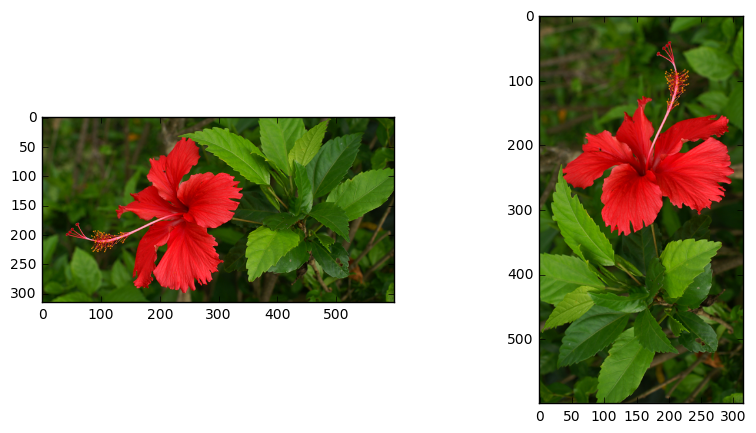

In [9]:
# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x = tf.transpose(x, perm=[1, 0, 2])   # x, y축만 서로 바꿔줌 (원래순서 : 0, 1, 2)

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result = session.run(x)

print(image.shape)    
print(type(result))
print(result.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

In [14]:
height, width, depth = image.shape
print(height, width, depth)
print([width]*height)

315 600 3
[600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600,

(315, 600, 3)
(315, 600, 3)


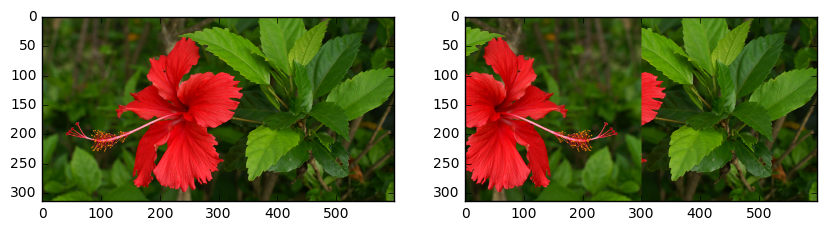

In [16]:

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x = tf.reverse_sequence(x, [width] * height, seq_dim=1, batch_dim=0)
#x = tf.reverse_sequence(x, np.ones((height,)) * width, seq_dim=1, batch_dim=0)

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result = session.run(x)

print(image.shape )
print (result.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

In [22]:
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x1_half = tf.slice(x, [0, 0, 0], [height, width / 2, 3]) 

x = tf.Variable(image, name='x')
x2 = tf.reverse_sequence(x, [width / 2] * height, seq_dim=1, batch_dim=0)
x2_half = tf.slice(x2, [0, 0, 0], [height, width / 2, 3])

x3 = tf.concat(concat_dim=1, values=[x1_half, x2_half])

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result = session.run(x3)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

TypeError: Expected int32 passed to parameter 'size' of op 'Slice', got [315, 300.0, 3] of type 'list' instead.